Set up

Importing the neccesary modules 

In [27]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn
%pip install plotly
#%pip install tabulate

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: scikit-learn in c:\python311\lib\site-packages (1.4.0)



DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import pandas as pd
import numpy as np
# import tabulate.tabulate as tabulate
import matplotlib.pyplot as plt
import plotly.express as pltex
import os

print("all necessary packages are imported successfully")

all necessary packages are imported successfully


Some helpful wrappers to provide information about the executed functions

In [29]:
#Needs more work
def boolExecuted(func):
    def wrapper(*args, **kwargs):
        print(f"Function {func.__name__} has been executed")
        print(f"Arguments: {args}")
        print(f"Keyword arguments: {kwargs}")
        print(f"Return value: {func(*args, **kwargs)}")
        # print(f"This function's description: {func.__doc__}")
        return func(*args, **kwargs)
    return wrapper
        

print("all decorators have been defined successfully")


all decorators have been defined successfully


Functions to open the files and join them into a single Pandas DataFrame

findFiles(path:str, exclude:str="output.csv")->list[str]:
    Finds all csv files in the location of the path and stores their names into the list files
    It excludes the file given as input in the exclude argument

In [30]:
#@boolExecuted
def findFiles(path:str, exclude:str="output.csv")->list[str]:
    findFiles.__doc__ = "This function finds all the files in the specified path"
    files = [
        file
        for file in os.listdir(path)
        if file.endswith(".csv") and file != exclude 
    ]
    return files

mergeFiles(files : list[str], path:str)->pandas.DataFrame:
    Merges all the files that are contained in the files argument (presumes that they exist in path). 
    Return a pandas.DataFrame

In [31]:
#@boolExecuted
def mergeFiles(files : list[str], path:str)->pd.DataFrame:
    mergeFiles.__doc__ = "This function merges all the files in the specified path into a pandas DataFrame"
    for file in files:
        full_file = open(path + "\\" + file, "r")
        current_data = pd.read_csv(full_file)
        current_data.set_index("timestamp", inplace=True)
        if "data" not in locals():
            data = current_data
        else:
            ## For every file, we add a row with index Nan to separate the data
            data = pd.concat([data, pd.DataFrame(index=[np.nan])])
            data = pd.concat([data, current_data], axis=0)

    return data

Method to seperate files (and other groups) from the collective DataFrame

In [32]:
def createSeperateDataFramesFromCollective(data:pd.DataFrame)->list[pd.DataFrame]:
    createSeperateDataFramesFromCollective.__doc__ = "This function creates a list of dataframes from the collective dataframe"
    split_by = data.index.isna().cumsum()
    dataframes = [dataframe for _, dataframe in data.groupby(split_by) if not dataframe.dropna().empty]
    return dataframes

createSeperateDataFrames(files: list[str], path:str) -> dict[pandas.DataFrame]: Create a dict of pd.DataFrames that have the data of each file

In [33]:
def createSeperateDataFramesFromFiles(files:list[str],path:str)->dict[pd.DataFrame]:
    output = {}
    for file in files:
        full_file = open(path + "\\" + file, "r")
        current_data = pd.read_csv(full_file)
        current_data.set_index("timestamp", inplace=True)
        output[file] = current_data
    return output

createOutput(data:pandas.DataFrame, path:str, output:str="output.csv")->None:
    Given the data as a pd.DataFrame, it stores the data in the given path as a csv named output.csv

In [34]:
#@boolExecuted
def createOutput(data:pd.DataFrame, path:str, output:str="output.csv")->None:
    createOutput.__doc__ = "This function creates a new csv file with the merged data"
    data.to_csv(path + "\\" + output)

Gather up all functions used to get the raw data and execute them

In [35]:
def getData():
    path = "\\".join(os.getcwd().split("\\")[:-1]) + "\Dataset"
    files = findFiles(path)
    merged_data = mergeFiles(files, path)
    seperate_data = createSeperateDataFramesFromFiles(files, path)
    ##createOutput(data, path)

    print("Files merged successfully.")
    return merged_data,seperate_data
merged_data, seperate_data = getData()

Files merged successfully.


Preproccessing code

describeData(data:pd.DataFrame)->None:
    This function prints the amount of missing data in each column as well as the statistical characteristics of the data 

In [36]:
#@boolExecuted
def describeData(data:pd.DataFrame)->None:
    describeData.__doc__ = "This function prints the amount of missing data in each column as well as the statistical characteristics of the data "
    total_length = len(data)

    # print missing percentage of each column
    print("Table of missing data percentages in the dataset\n")
    lenOfColumnStrings = []
    stringOfPercantages = []
    lenOfPercentageStrings = []
    whitespace = 3
    for column in data.columns:
        lenOfColumnStrings.append( len(column) + whitespace)
        stringOfPercantage = str(data[column].isnull().sum()/total_length*100) +"%"
        stringOfPercantages.append(stringOfPercantage)
        lenOfPercentageStrings.append( len(stringOfPercantage) + whitespace)
        print()
        print(f"The percentage of missing data in the column {column} is {data[column].isnull().sum()/total_length*100}%\n")
    
    # print the statistical characteristics of the data
    # with pd.option_context('expand_frame_repr',False):
    #     print(data.describe())

Firstly, get rid of index and Unnamed columns, cause they have too many vacant cells

In [37]:
def removeIncompleteData(data):
    # difference_in_index_column = data["index"].isnull().sum()
    # difference_in_Unnamed_column = data["Unnamed: 0"].isnull().sum()
    # total_rows = len(data["index"])
    # print(f"Number of rows with missing data in index column: {difference_in_index_column} in comparison to {total_rows} total rows.")
    # print(f"Number of rows with missing data in Unnamed column: {difference_in_Unnamed_column} in comparison to {total_rows} total rows.")
    
    print("Removing rows with missing data...")
    data = data.drop(["index", "Unnamed: 0"],axis='columns')
    print("Rows with missing data have been removed successfully.")
    return data    

Maybe compress the data by sampling or getting the mean of a time sequence

In [38]:
def compressData(data:pd.DataFrame, underSamplingDigit:int = 2)->pd.DataFrame:
    compressedData = data.index.astype('str')[:-underSamplingDigit-10 ]
    print(type(compressedData[0]))
    print(compressedData[:10])
    
    data = data.groupby(compressedData).mean()
    print("Data has been compressed successfully.")
    return data

Plot the data

In [39]:
def plotData(data:pd.DataFrame,start = 0,stop = 10000)->None:
    print("Plotting data...")
    working_data = data.iloc[start:stop]
    indicies = pd.DataFrame()
    indicies["time"] = (pd.to_datetime(working_data.index)-pd.to_datetime(working_data.index[0])).total_seconds()

    y = working_data
    y.index = indicies["time"]
    y.plot(xlabel = "Time (s)", ylabel = "Value", title = "Data Plot")
    plt.ylim(-4, 9)
    plt.legend(loc='upper right')
    plt.show()
    print("Data has been plotted successfully.")
    ##return data

Check if there is some correlation between back_x and thigh_x. Same for the other pairs

In [40]:
def checkCorrelation(data:pd.DataFrame)->None:
    working_data = data.loc[:, data.columns != 'label']
    correlation = working_data.corr()
    hide = np.triu(np.ones(correlation.shape)).astype(bool)
    correlation = correlation.mask(hide)
    correlation = correlation.mask(abs(correlation) < 0.1)
    correlation = correlation.stack().reset_index()
    correlation.columns = ['First Variable', 'Second Variable', 'Correlation']
    # correlation = correlation.mask(abs(correlation["Correlation"]) < 0.09)
    print(correlation)

    print("Correlation has been checked successfully.")

Use all previous preproccessing states and explain them

Table of missing data percentages in the dataset


The percentage of missing data in the column back_x is 0.0%


The percentage of missing data in the column back_y is 0.0%


The percentage of missing data in the column back_z is 0.0%


The percentage of missing data in the column thigh_x is 0.0%


The percentage of missing data in the column thigh_y is 0.0%


The percentage of missing data in the column thigh_z is 0.0%


The percentage of missing data in the column label is 0.0%


The percentage of missing data in the column index is 88.8468902987126%


The percentage of missing data in the column Unnamed: 0 is 97.86969489863384%

Getting rid of unnecessary columns...
Removing rows with missing data...
Rows with missing data have been removed successfully.
The data without unnecessary columns: 
                           back_x    back_y    back_z   thigh_x   thigh_y   thigh_z  label
2019-01-12 00:00:00.000 -0.760242  0.299570  0.468570 -5.092732 -0.298644  0.709439    6.0
2019-01-12 

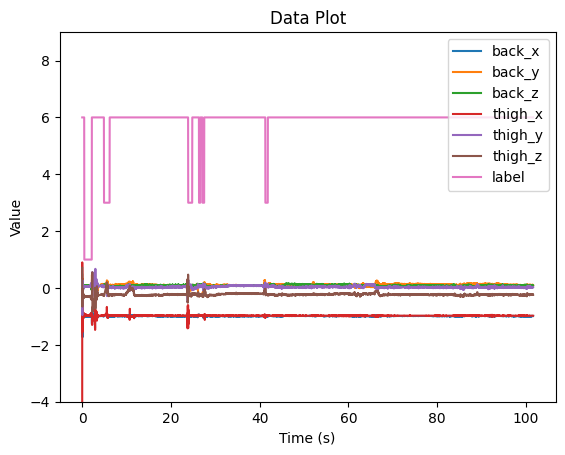

Data has been plotted successfully.
Checking correlation...
  First Variable Second Variable  Correlation
0         back_z          back_x    -0.103727
1        thigh_x          back_x     0.435847
2        thigh_x          back_z    -0.105903
3        thigh_y          back_y    -0.187453
4        thigh_y         thigh_x     0.159553
5        thigh_z          back_z    -0.165214
6        thigh_z         thigh_x     0.429772
7        thigh_z         thigh_y     0.149124
Correlation has been checked successfully.


In [41]:
def preproccessing(merged_data:pd.DataFrame)->pd.DataFrame:
    data = merged_data.dropna(how='all')
    describeData(data)
    print("Getting rid of unnecessary columns...")

    data_without_unnecessary_columns = removeIncompleteData(data)

    with pd.option_context('expand_frame_repr',False):  

        print(f"The data without unnecessary columns: \n{data_without_unnecessary_columns.head()}")


    # print("Compressing data...")

    # compressed_data = compressData(data_without_unnecessary_columns)


    print("Preproccessing is done successfully.")

    preproccessed_data = data_without_unnecessary_columns


    print("Plotting data...")

    plotData(preproccessed_data)


    print("Checking correlation...")

    checkCorrelation(preproccessed_data)

    return preproccessed_data



preproccessed_data = preproccessing(merged_data)

Check for seperate data correlation

Check the seperate data

In [42]:
# def describe_seperate_data(seperate_data:dict[pd.DataFrame])->None:
#     describeData.__doc__ = "This function prints the amount of missing data in each column as well as the statistical characteristics of the data "
#     total_length = len(data)

#     # print missing percentage of each column
#     print("Table of missing data percentages in the dataset\n")
#     lenOfColumnStrings = []
#     stringOfPercantages = []
#     lenOfPercentageStrings = []
#     whitespace = 3

#     files = list(seperate_data.keys())
#     table = pd.DataFrame(index = files)
#     max_length_columns = []
#     max_length = 0
#     for file in files:
#         print(seperate_data[file].columns)
#         columns = seperate_data[file].columns
#         # max_length = len(columns)

#         if len(columns) > max_length:
#             max_length = len(columns)
#             max_length_columns = columns

#     print(max_length, max_length_columns)
#     table[max_length_columns] = 0


    # table[list(seperate_data.keys)] = [seperate_data[seperate_data.keys()[0]].columns]
    # table.columns = [1]
    # table.columns = list(seperate_data.keys())
    # table = pd.DataFrame(
    #     columns=seperate_data.keys(), index=seperate_data[seperate_data.keys()[0]].columns
    # )
#     print(table)

# describe_seperate_data(seperate_data)
# for column in data.columns:
#     lenOfColumnStrings.append( len(column) + whitespace)
#     stringOfPercantage = str(data[column].isnull().sum()/total_length*100) +"%"
#     stringOfPercantages.append(stringOfPercantage)
#     lenOfPercentageStrings.append( len(stringOfPercantage) + whitespace)
#     print()
#     print(f"The percentage of missing data in the column {column} is {data[column].isnull().sum()/total_length*100}%\n")

# print the statistical characteristics of the data
# with pd.option_context('expand_frame_repr',False):
#     print(data.describe())

Preprocessing S006.csv data...
The data without unnecessary columns: 
Index(['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z', 'label'], dtype='object')
Preproccessing is done successfully.
Plotting data...
408709
Plotting data...


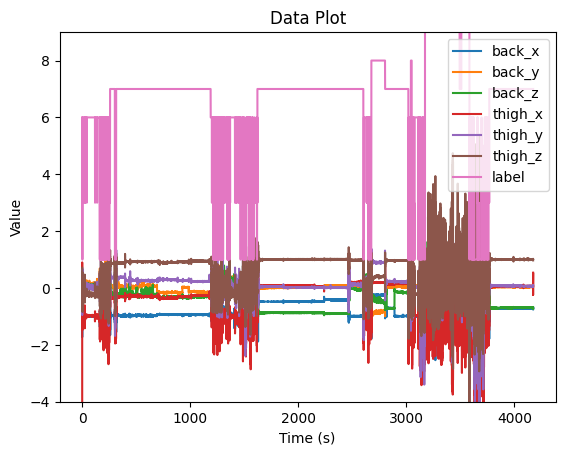

Data has been plotted successfully.
Checking correlation...
   First Variable Second Variable  Correlation
0          back_y          back_x    -0.311357
1          back_z          back_x    -0.685972
2         thigh_x          back_x     0.584329
3         thigh_x          back_y    -0.179142
4         thigh_x          back_z    -0.765473
5         thigh_y          back_y    -0.658729
6         thigh_z          back_x     0.348377
7         thigh_z          back_y    -0.104510
8         thigh_z          back_z    -0.601516
9         thigh_z         thigh_x     0.611128
10        thigh_z         thigh_y     0.183705
Correlation has been checked successfully.
Preprocessing S008.csv data...
The data without unnecessary columns: 
Index(['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z', 'label'], dtype='object')
Preproccessing is done successfully.
Plotting data...
418989
Plotting data...


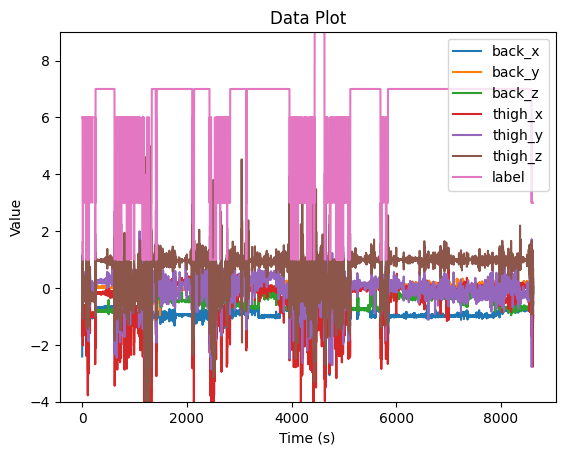

Data has been plotted successfully.
Checking correlation...
  First Variable Second Variable  Correlation
0         back_z          back_x    -0.609736
1         back_z          back_y    -0.106374
2        thigh_x          back_x     0.275009
3        thigh_x          back_z    -0.536753
4        thigh_y          back_y    -0.214233
5        thigh_z          back_x     0.301330
6        thigh_z          back_y    -0.125404
7        thigh_z          back_z    -0.562754
8        thigh_z         thigh_x     0.796152
Correlation has been checked successfully.
Preprocessing S009.csv data...
The data without unnecessary columns: 
Index(['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z', 'label'], dtype='object')
Preproccessing is done successfully.
Plotting data...
154464
Plotting data...


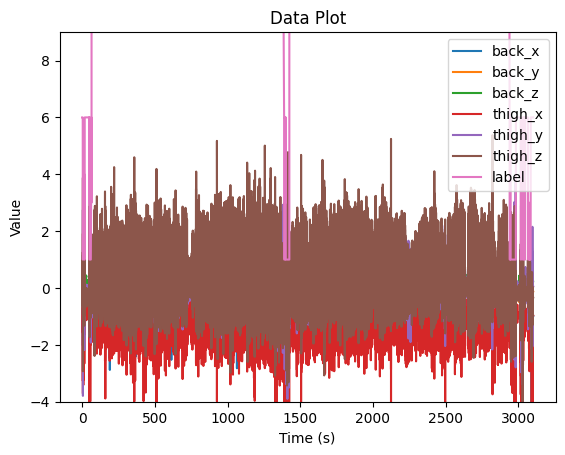

Data has been plotted successfully.
Checking correlation...
  First Variable Second Variable  Correlation
0         back_z          back_x    -0.216605
1        thigh_x          back_x     0.101636
2        thigh_x          back_y     0.272861
3        thigh_x          back_z    -0.211203
4        thigh_y          back_y    -0.211022
5        thigh_y         thigh_x    -0.412022
6        thigh_z          back_y    -0.177225
7        thigh_z         thigh_x    -0.753149
8        thigh_z         thigh_y     0.335854
Correlation has been checked successfully.
Preprocessing S010.csv data...
The data without unnecessary columns: 
Index(['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z', 'label'], dtype='object')
Preproccessing is done successfully.
Plotting data...
351649
Plotting data...


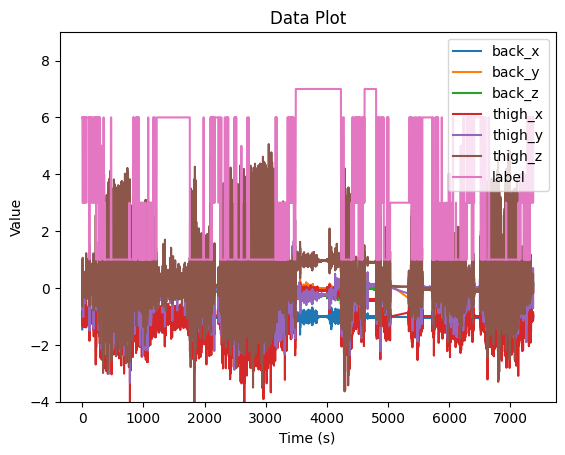

Data has been plotted successfully.
Checking correlation...
  First Variable Second Variable  Correlation
0        thigh_x          back_x     0.381987
1        thigh_x          back_z    -0.494678
2        thigh_y          back_y     0.115157
3        thigh_y          back_z     0.159392
4        thigh_y         thigh_x    -0.231106
5        thigh_z          back_x    -0.107900
6        thigh_z          back_z    -0.324210
7        thigh_z         thigh_x     0.319667
Correlation has been checked successfully.
Preprocessing S012.csv data...
The data without unnecessary columns: 
Index(['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z', 'label'], dtype='object')
Preproccessing is done successfully.
Plotting data...
382414
Plotting data...


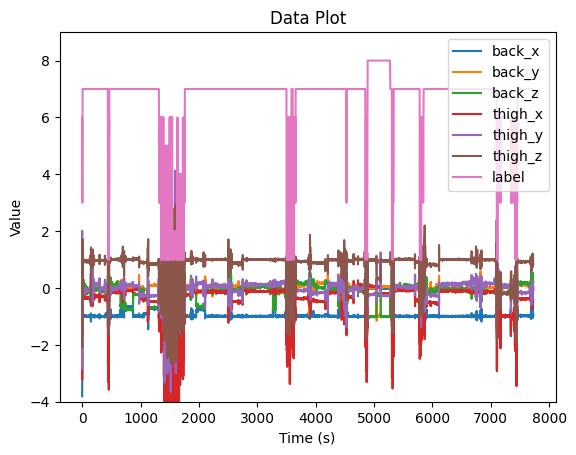

Data has been plotted successfully.
Checking correlation...
  First Variable Second Variable  Correlation
0         back_y          back_x    -0.258357
1         back_z          back_x    -0.681250
2        thigh_x          back_x     0.253101
3        thigh_x          back_z    -0.145173
4        thigh_y          back_y    -0.391720
5        thigh_y          back_z     0.105313
6        thigh_y         thigh_x     0.176597
7        thigh_z          back_y     0.169843
8        thigh_z         thigh_x     0.732277
9        thigh_z         thigh_y    -0.107957
Correlation has been checked successfully.
Preprocessing S013.csv data...
The data without unnecessary columns: 
Index(['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z', 'label'], dtype='object')
Preproccessing is done successfully.
Plotting data...
369077
Plotting data...


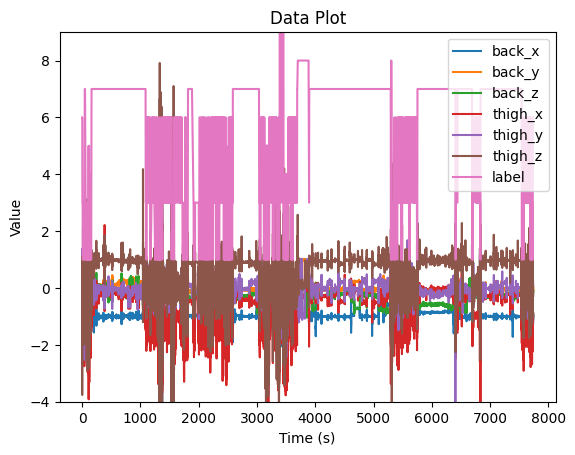

Data has been plotted successfully.
Checking correlation...
   First Variable Second Variable  Correlation
0          back_z          back_x    -0.286693
1         thigh_x          back_x     0.372088
2         thigh_x          back_y     0.151064
3         thigh_x          back_z    -0.472195
4         thigh_y          back_y    -0.449811
5         thigh_y         thigh_x    -0.274389
6         thigh_z          back_x     0.161832
7         thigh_z          back_y     0.103551
8         thigh_z          back_z    -0.408538
9         thigh_z         thigh_x     0.717318
10        thigh_z         thigh_y    -0.307073
Correlation has been checked successfully.
Preprocessing S014.csv data...
The data without unnecessary columns: 
Index(['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z', 'label'], dtype='object')
Preproccessing is done successfully.
Plotting data...
366487
Plotting data...


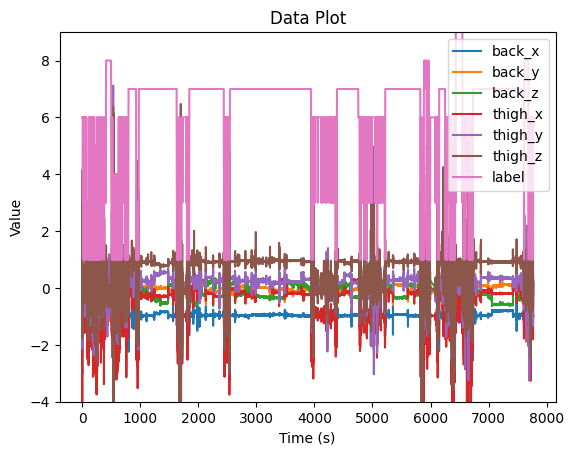

Data has been plotted successfully.
Checking correlation...
   First Variable Second Variable  Correlation
0          back_y          back_x     0.138470
1          back_z          back_x    -0.253735
2          back_z          back_y    -0.260491
3         thigh_x          back_x     0.218874
4         thigh_x          back_y     0.170170
5         thigh_x          back_z    -0.576054
6         thigh_y          back_y    -0.338456
7         thigh_y          back_z    -0.278588
8         thigh_y         thigh_x     0.299253
9         thigh_z          back_z    -0.453043
10        thigh_z         thigh_x     0.687470
11        thigh_z         thigh_y     0.378769
Correlation has been checked successfully.
Preprocessing S015.csv data...
The data without unnecessary columns: 
Index(['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z', 'label'], dtype='object')
Preproccessing is done successfully.
Plotting data...
418392
Plotting data...


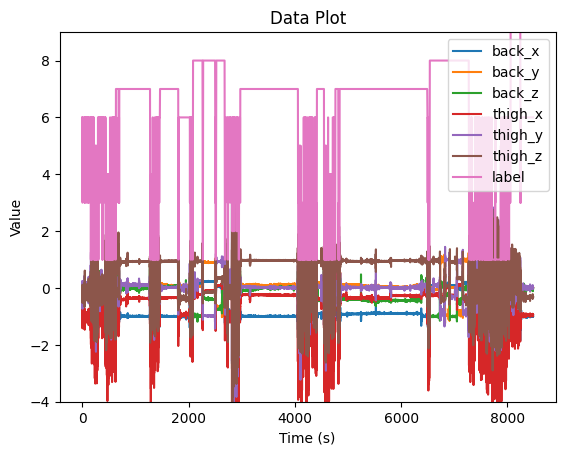

Data has been plotted successfully.
Checking correlation...
  First Variable Second Variable  Correlation
0         back_z          back_x    -0.585205
1        thigh_x          back_x     0.426937
2        thigh_x          back_z    -0.499626
3        thigh_y          back_x    -0.114312
4        thigh_y          back_y    -0.785473
5        thigh_z          back_z    -0.427304
6        thigh_z         thigh_x     0.478465
7        thigh_z         thigh_y     0.112395
Correlation has been checked successfully.
Preprocessing S016.csv data...
The data without unnecessary columns: 
Index(['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z', 'label'], dtype='object')
Preproccessing is done successfully.
Plotting data...
355418
Plotting data...


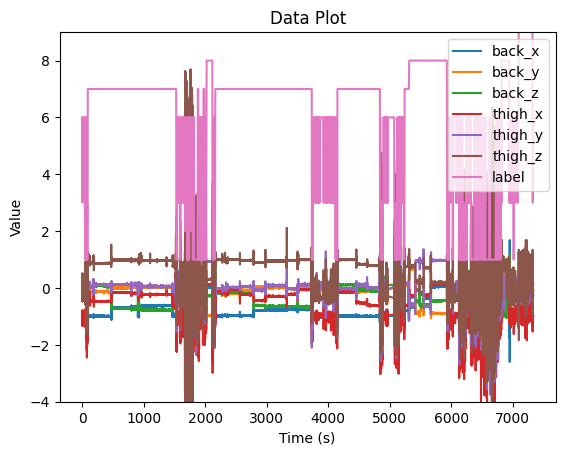

Data has been plotted successfully.
Checking correlation...
   First Variable Second Variable  Correlation
0          back_y          back_x    -0.346092
1          back_z          back_x    -0.558351
2         thigh_x          back_x     0.567708
3         thigh_x          back_y    -0.193672
4         thigh_x          back_z    -0.642078
5         thigh_y          back_x     0.394255
6         thigh_y          back_y    -0.759181
7         thigh_y         thigh_x     0.156029
8         thigh_z          back_x     0.152847
9         thigh_z          back_y     0.142238
10        thigh_z          back_z    -0.546239
11        thigh_z         thigh_x     0.519790
Correlation has been checked successfully.
Preprocessing S017.csv data...
The data without unnecessary columns: 
Index(['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z', 'label'], dtype='object')
Preproccessing is done successfully.
Plotting data...
366609
Plotting data...


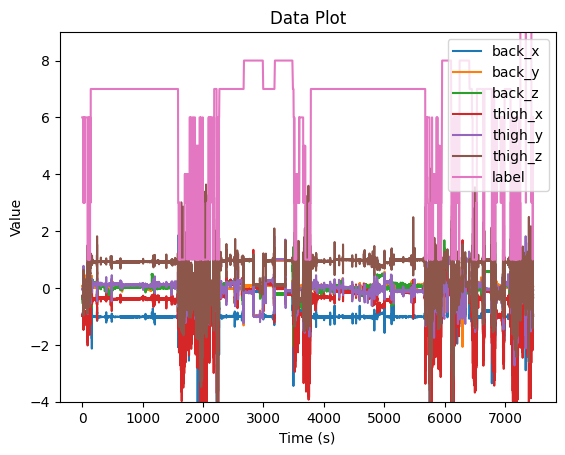

Data has been plotted successfully.
Checking correlation...
  First Variable Second Variable  Correlation
0         back_z          back_x     0.289523
1         back_z          back_y    -0.111399
2        thigh_x          back_x     0.322773
3        thigh_x          back_z     0.526339
4        thigh_y          back_y     0.778091
5        thigh_z          back_z     0.567732
6        thigh_z         thigh_x     0.542435
Correlation has been checked successfully.
Preprocessing S018.csv data...
The data without unnecessary columns: 
Index(['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z', 'label'], dtype='object')
Preproccessing is done successfully.
Plotting data...
322271
Plotting data...


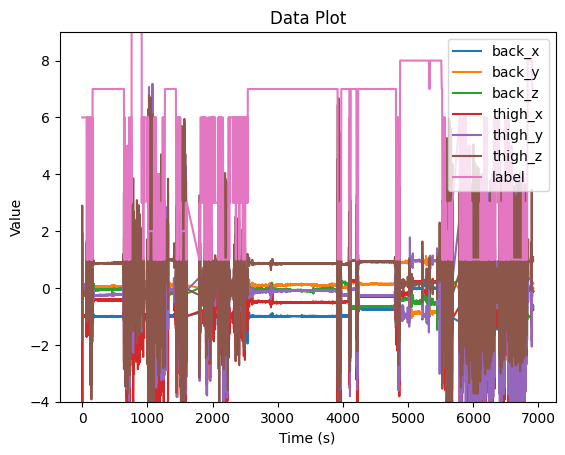

Data has been plotted successfully.
Checking correlation...
  First Variable Second Variable  Correlation
0         back_z          back_x    -0.416782
1        thigh_x          back_x     0.527323
2        thigh_x          back_z    -0.426041
3        thigh_y          back_y    -0.535884
4        thigh_y         thigh_x    -0.237245
5        thigh_z          back_x     0.124919
6        thigh_z          back_z    -0.211966
7        thigh_z         thigh_x     0.160034
Correlation has been checked successfully.
Preprocessing S019.csv data...
The data without unnecessary columns: 
Index(['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z', 'label'], dtype='object')
Preproccessing is done successfully.
Plotting data...
297945
Plotting data...


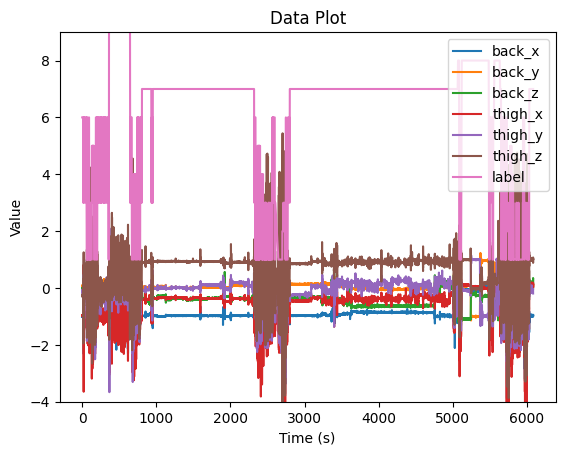

Data has been plotted successfully.
Checking correlation...
  First Variable Second Variable  Correlation
0         back_z          back_x    -0.306430
1        thigh_x          back_x     0.524217
2        thigh_x          back_z    -0.537396
3        thigh_y          back_y    -0.712233
4        thigh_y          back_z    -0.122484
5        thigh_y         thigh_x     0.171763
6        thigh_z          back_z    -0.461941
7        thigh_z         thigh_x     0.449628
8        thigh_z         thigh_y     0.162520
Correlation has been checked successfully.
Preprocessing S020.csv data...
The data without unnecessary columns: 
Index(['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z', 'label'], dtype='object')
Preproccessing is done successfully.
Plotting data...
371496
Plotting data...


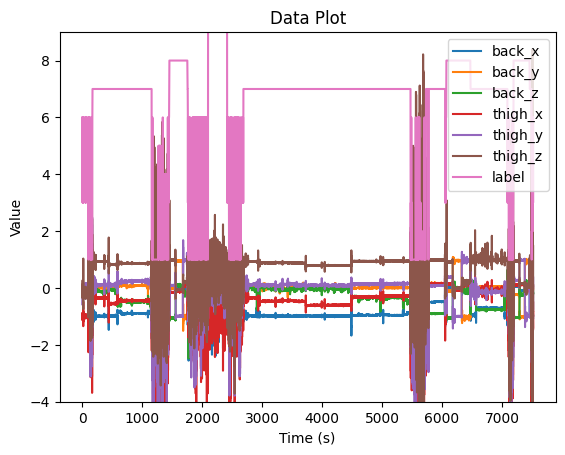

Data has been plotted successfully.
Checking correlation...
  First Variable Second Variable  Correlation
0         back_z          back_x    -0.345949
1        thigh_x          back_x     0.531773
2        thigh_x          back_z    -0.492168
3        thigh_y          back_y    -0.737634
4        thigh_y          back_z    -0.142558
5        thigh_z          back_z    -0.333936
6        thigh_z         thigh_x     0.300924
7        thigh_z         thigh_y     0.131325
Correlation has been checked successfully.
Preprocessing S021.csv data...
The data without unnecessary columns: 
Index(['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z', 'label'], dtype='object')
Preproccessing is done successfully.
Plotting data...
302247
Plotting data...


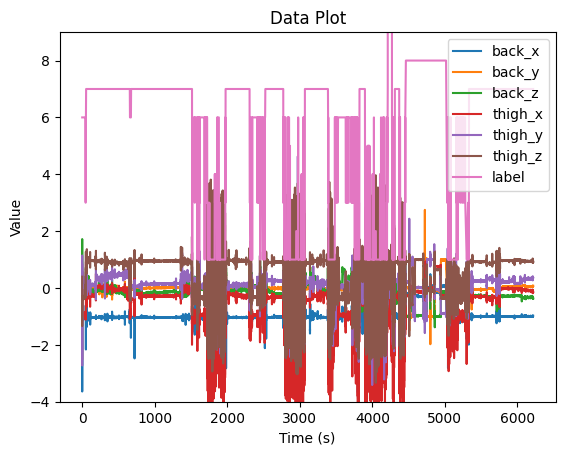

Data has been plotted successfully.
Checking correlation...
  First Variable Second Variable  Correlation
0         back_z          back_x    -0.354695
1        thigh_x          back_x     0.146845
2        thigh_x          back_y    -0.117650
3        thigh_x          back_z    -0.482647
4        thigh_y          back_y    -0.648204
5        thigh_y         thigh_x     0.116506
6        thigh_z          back_z    -0.460878
7        thigh_z         thigh_x     0.497799
8        thigh_z         thigh_y     0.178743
Correlation has been checked successfully.
Preprocessing S022.csv data...
The data without unnecessary columns: 
Index(['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z', 'label'], dtype='object')
Preproccessing is done successfully.
Plotting data...
337602
Plotting data...


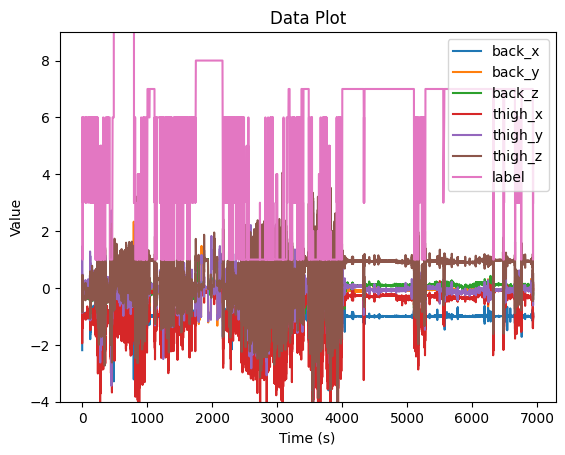

Data has been plotted successfully.
Checking correlation...
  First Variable Second Variable  Correlation
0         back_z          back_x     0.231812
1        thigh_x          back_x     0.341449
2        thigh_x          back_z     0.572963
3        thigh_y          back_y     0.562764
4        thigh_z          back_z     0.559997
5        thigh_z         thigh_x     0.522939
Correlation has been checked successfully.
Preprocessing S023.csv data...
The data without unnecessary columns: 
Index(['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z', 'label'], dtype='object')
Preproccessing is done successfully.
Plotting data...
137646
Plotting data...


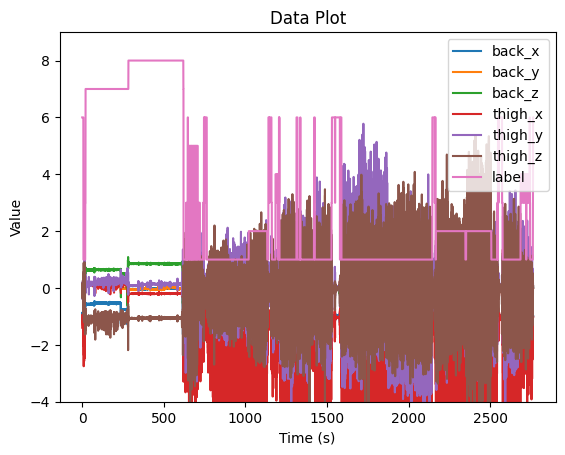

Data has been plotted successfully.
Checking correlation...
   First Variable Second Variable  Correlation
0          back_z          back_x     0.507963
1          back_z          back_y     0.108061
2         thigh_x          back_x     0.571348
3         thigh_x          back_y    -0.207140
4         thigh_x          back_z     0.505879
5         thigh_y          back_x     0.179811
6         thigh_y          back_y     0.289448
7         thigh_y          back_z     0.149912
8         thigh_z          back_x    -0.445585
9         thigh_z          back_z    -0.445600
10        thigh_z         thigh_x    -0.289399
11        thigh_z         thigh_y    -0.116410
Correlation has been checked successfully.
Preprocessing S024.csv data...
The data without unnecessary columns: 
Index(['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z', 'label'], dtype='object')
Preproccessing is done successfully.
Plotting data...
170534
Plotting data...


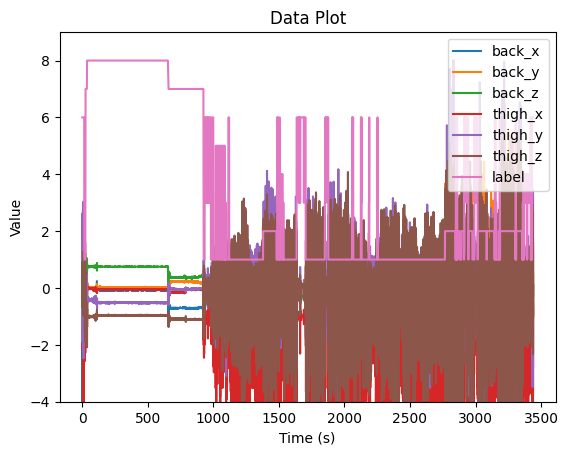

Data has been plotted successfully.
Checking correlation...
   First Variable Second Variable  Correlation
0          back_z          back_x     0.512286
1          back_z          back_y     0.137600
2         thigh_x          back_x     0.549896
3         thigh_x          back_z     0.514695
4         thigh_y          back_x    -0.149349
5         thigh_y          back_y     0.176233
6         thigh_y          back_z    -0.326639
7         thigh_z          back_x    -0.351567
8         thigh_z          back_y    -0.285078
9         thigh_z          back_z    -0.463337
10        thigh_z         thigh_y     0.252267
Correlation has been checked successfully.
Preprocessing S025.csv data...
The data without unnecessary columns: 
Index(['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z', 'label'], dtype='object')
Preproccessing is done successfully.
Plotting data...
231729
Plotting data...


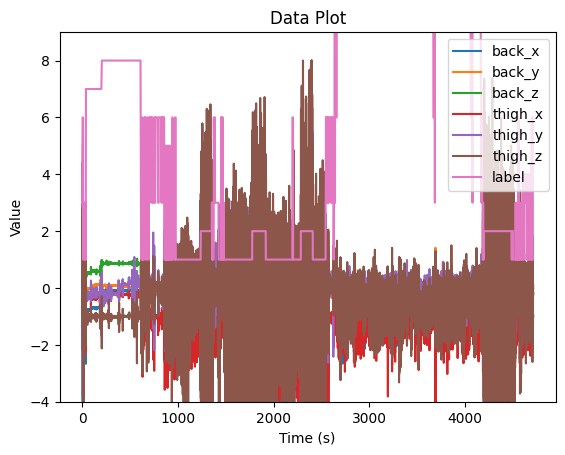

Data has been plotted successfully.
Checking correlation...
  First Variable Second Variable  Correlation
0         back_y          back_x     0.336915
1         back_z          back_x     0.404319
2         back_z          back_y     0.377062
3        thigh_x          back_x     0.568299
4        thigh_x          back_z     0.384478
5        thigh_y          back_x     0.118682
6        thigh_y         thigh_x     0.314277
7        thigh_z          back_x    -0.300401
8        thigh_z          back_y    -0.315057
9        thigh_z          back_z    -0.251628
Correlation has been checked successfully.
Preprocessing S026.csv data...
The data without unnecessary columns: 
Index(['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z', 'label'], dtype='object')
Preproccessing is done successfully.
Plotting data...
195172
Plotting data...


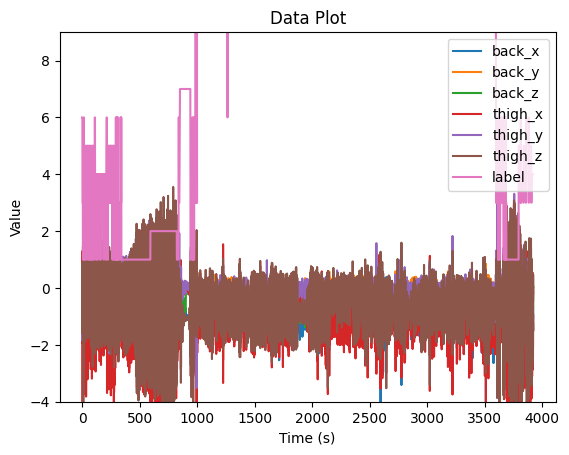

Data has been plotted successfully.
Checking correlation...
  First Variable Second Variable  Correlation
0        thigh_x          back_x     0.362038
1        thigh_x          back_y    -0.220427
2        thigh_y          back_x     0.160978
3        thigh_y         thigh_x     0.352260
4        thigh_z          back_x    -0.223283
5        thigh_z          back_y    -0.189455
6        thigh_z          back_z     0.359580
7        thigh_z         thigh_x     0.166389
Correlation has been checked successfully.
Preprocessing S027.csv data...
The data without unnecessary columns: 
Index(['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z', 'label'], dtype='object')
Preproccessing is done successfully.
Plotting data...
158584
Plotting data...


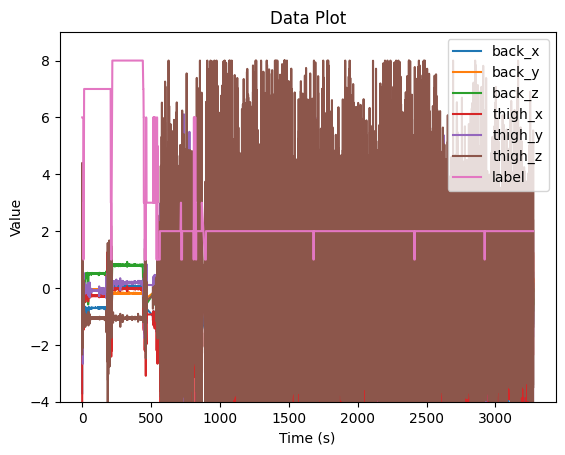

Data has been plotted successfully.
Checking correlation...
  First Variable Second Variable  Correlation
0         back_z          back_x    -0.189117
1         back_z          back_y    -0.191945
2        thigh_x          back_x     0.607520
3        thigh_x          back_y    -0.288849
4        thigh_y          back_x     0.111056
5        thigh_y         thigh_x     0.191176
6        thigh_z          back_x    -0.180908
7        thigh_z          back_y    -0.124268
8        thigh_z          back_z    -0.135710
9        thigh_z         thigh_x     0.239589
Correlation has been checked successfully.
Preprocessing S028.csv data...
The data without unnecessary columns: 
Index(['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z', 'label'], dtype='object')
Preproccessing is done successfully.
Plotting data...
165178
Plotting data...


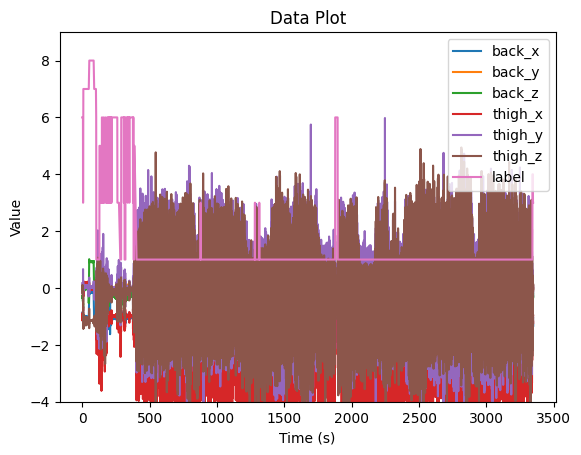

Data has been plotted successfully.
Checking correlation...
   First Variable Second Variable  Correlation
0          back_y          back_x     0.126076
1          back_z          back_x     0.602721
2         thigh_x          back_x     0.475915
3         thigh_x          back_z     0.544900
4         thigh_y          back_x     0.108437
5         thigh_y         thigh_x     0.386814
6         thigh_z          back_x     0.132796
7         thigh_z          back_y    -0.166061
8         thigh_z          back_z    -0.128838
9         thigh_z         thigh_x     0.271920
10        thigh_z         thigh_y     0.275826
Correlation has been checked successfully.
Preprocessing S029.csv data...
The data without unnecessary columns: 
Index(['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z', 'label'], dtype='object')
Preproccessing is done successfully.
Plotting data...
178716
Plotting data...


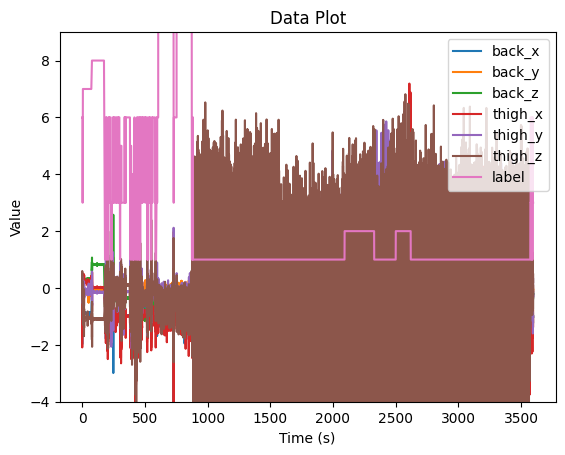

Data has been plotted successfully.
Checking correlation...
   First Variable Second Variable  Correlation
0          back_y          back_x     0.132194
1          back_z          back_x     0.391134
2         thigh_x          back_x     0.428456
3         thigh_x          back_y    -0.147406
4         thigh_x          back_z     0.414492
5         thigh_y          back_x     0.247986
6         thigh_y          back_y     0.150975
7         thigh_y          back_z     0.143167
8         thigh_y         thigh_x     0.307247
9         thigh_z          back_y    -0.153735
10        thigh_z         thigh_x     0.482617
11        thigh_z         thigh_y     0.172076
Correlation has been checked successfully.


In [43]:
def preprocessing_seperate(seperate_data: dict[pd.DataFrame]) -> dict[pd.DataFrame]:
    preproccessed_output = {}
    for key in seperate_data:
        data = seperate_data[key]
        print(f"Preprocessing {key} data...")
        data_without_unnecessary_columns = data[
            ["back_x", "back_y", "back_z", "thigh_x", "thigh_y", "thigh_z", "label"]
        ]
        # describeData(data)
        # print("Getting rid of unnecessary columns...")
        # data_without_unnecessary_columns = removeIncompleteData(data)
        with pd.option_context("expand_frame_repr", False):
            print(
                f"The data without unnecessary columns: \n{data_without_unnecessary_columns.columns}"
            )

        # # print("Compressing data...")
        # # compressed_data = compressData(data_without_unnecessary_columns)

        print("Preproccessing is done successfully.")
        preproccessed_data = data_without_unnecessary_columns

        print("Plotting data...")
        print(len(preproccessed_data.index))
        plotData(preproccessed_data,0,len(preproccessed_data.index))

        print("Checking correlation...")
        checkCorrelation(preproccessed_data)
        preproccessed_output[key] = data
    return preproccessed_output


preproccessed_seperate_data = preprocessing_seperate(seperate_data)

In [44]:
# max = len(preproccessed_data['label'])
# i=0
# while i<max:
#     new_i = i + 75000
#     plotData(preproccessed_data["label"], i, new_i)
#     i = new_i

# max = len(preproccessed_data['label'])

# boxplot = preproccessed_data.boxplot(column=['label'],return_type='both')
# plt.show()
# print(boxplot[1].keys())
# print(boxplot[1]['whiskers'][0].get_ydata())
# print(boxplot[1]['whiskers'][1].get_ydata())
# print(boxplot[1]['boxes'][0].get_ydata())
# print(boxplot[1]['caps'][0].get_ydata())
# print(boxplot[1]['caps'][1].get_ydata())
# print(boxplot[1]['medians'][0].get_ydata())
# print(len(boxplot[1]['fliers'][0].get_ydata()))
# print(set(boxplot[1]['fliers'][0].get_ydata()))
# print(boxplot[1])
# print(len(boxplot[1]['means'].get_ydata()))

Make boxplot to check for outliers and statistical characteristics

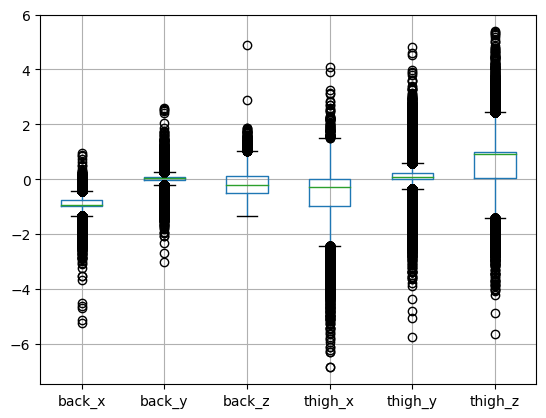

In [45]:
boxplot = preproccessed_data.head(1000000).boxplot(column=['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z'])
plt.show()

Find if there is a class imbalance in the data

Number of rows with label 1.0: 1197155
Number of rows with label 2.0: 291356
Number of rows with label 3.0: 254839
Number of rows with label 4.0: 76217
Number of rows with label 5.0: 67253
Number of rows with label 6.0: 743480
Number of rows with label 7.0: 2902703
Number of rows with label 8.0: 428898
Number of rows with label 13.0: 393963
Number of rows with label 14.0: 55814
Number of rows with label 130.0: 41785
Number of rows with label 140.0: 7865


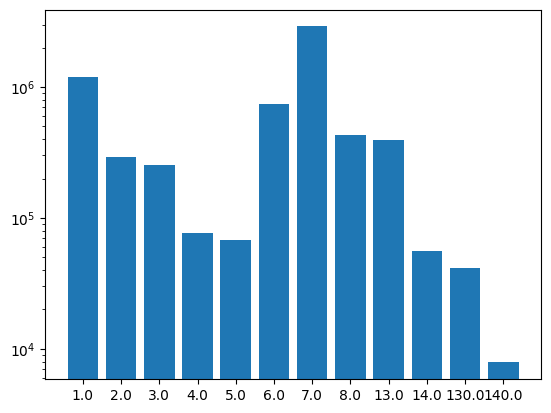

In [20]:
listOfLabels = list(set(preproccessed_data["label"]))
listOfLabels.sort()


for label in listOfLabels:
    length = len(preproccessed_data.loc[preproccessed_data['label']==label])
    print(f"Number of rows with label {label}: {length}")

# plt.subplot(2,1,1)

ax = plt.bar(
    [str(x) for x in listOfLabels],
    [
        len(preproccessed_data.loc[preproccessed_data["label"] == label])
        for label in listOfLabels
    ],
    log=True,
)
plt.show()

# ax.bar_label(ax[0], fontsize=10)
# plt.subplot(2,1,2)
# plt.bar(
#     [str(x) for x in listOfLabels],
#     [
#         len(preproccessed_data.loc[preproccessed_data["label"] == label])
#         for label in listOfLabels
#     ],
# )
# plt.ylabel("Logarithm of the number of rows")
# plt.xlabel("Label")

# import seaborn as sns
# sns.barplot(
#     x = [str(x) for x in listOfLabels],
#     y = [len(preproccessed_data.loc[preproccessed_data["label"] == label])
#         for label in listOfLabels
#     ],
#     log_scale=10
# )
# ax = sns.barplot(
#     x=[str(x) for x in listOfLabels],
#     y=[
#         len(preproccessed_data.loc[preproccessed_data["label"] == label])
#         for label in listOfLabels
#     ],
# )
# ax.bar_label(ax.containers[0], fontsize=10)

We see that there is a class imbalance in thte labels of data. Maybe by combining certain classes (like 14,130,140 into cycling) we can restore some more balance. Otherwise, we can also subsample the labels with more samples then the rest, to make sure everything has the same samples.

We can also limit the classes, by having a model that only correctly labels  data that are within the limited classes.

In [46]:
# # only check labels that are in this list
# # for 4,5 put them together
# new_labels = [1,2,3,45,6,7,8]

# # combine labels 4 and 5,13,14,130,140
# # new_labels = [1,2,3,45,6,7,8,14]

# new_data = preproccessed_data.copy()
# new_data["label"] = new_data["label"].apply(lambda x: 45 if x in [4, 5] else x)
# # new_data["label"] = new_data["label"].apply(
# #     lambda x: float("nan") if x in [4, 5] else x
# # )
# new_data["label"] = new_data["label"].apply(
#     lambda x: x if x in new_labels else float("nan")
# )
# new_data = new_data.dropna()
# # print(new_data.loc[new_data["label"]==45])

# listOfLabels = list(set(new_data["label"]))
# # listOfLabels.sort()


# for label in listOfLabels:
#     length = len(new_data.loc[new_data["label"] == label])
#     print(f"Number of rows with label {label}: {length}")


# ax = plt.bar(
#     [str(x) for x in listOfLabels],
#     [
#         len(new_data.loc[new_data["label"] == label])
#         for label in listOfLabels
#     ], 
#     log=True,
# )
# plt.show()

In [47]:
# boxplot = new_data.boxplot(column=['label'],return_type='both')
# plt.show()

# the data is still imbalanced since there is an order of magnitude difference between the number of rows with different labels
# specifically, the number of rows with label 1,6,7 and 8 is in the order of 10^6 while the number of rows with label 2,3,45 is in the order of 10^5
# therefore, we need to cut the number of rows with label 1,6,7 and 8 to the order of 10^5, to make the data more balanced
# we see that labels 1,6,7 and 8 are mostly idle activities, so we can cut the rows where nothing is happening

Plot some data from where the subject is labeled, as well as its Fourier Transform to see if they abide by some seasonality/ if its a periodic signal

2019-01-12 00:59:57.020
24.857884858588907
                         back                windowed
count  100.000000+  0.000000j  100.000000+  0.000000j
mean    -0.044619+  0.000000j   -0.413664-  0.000000j
std      0.101444+  0.000000j    3.552926+  0.000000j
min     -1.808422-  0.132830j  -24.844485-  0.816078j
25%     -0.860515+  0.301126j   -0.013826+  0.018545j
50%     -0.019950-  0.000000j    0.005142-  0.001196j
75%      0.643253-  0.623364j    0.018857+  0.008603j
max      1.558980+  0.424896j    4.105724-  0.285713j
1.0
1.813293714858964
1.0
1.813293714858964
1.0
1.813293714858964
1.0
1.813293714858964
1.0
1.813293714858964
1.0
1.813293714858964
1.0
1.813293714858964
1.0
1.813293714858964
1.0
1.813293714858964
1.0
1.813293714858964
Dt = 0.06283185307179587


c:\Python311\Lib\site-packages\numpy\core\_methods.py:49: ComplexWarning:

Casting complex values to real discards the imaginary part

c:\Python311\Lib\site-packages\numpy\core\_methods.py:49: ComplexWarning:

Casting complex values to real discards the imaginary part

c:\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning:

Casting complex values to real discards the imaginary part



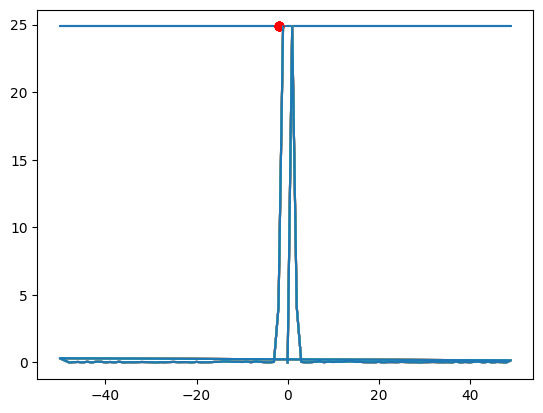

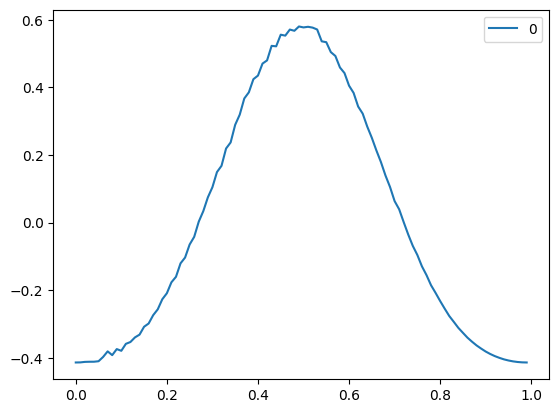

In [48]:

# Ts = (pd.to_datetime(preproccessed_data.index[1])-pd.to_datetime(preproccessed_data.index[0])).total_seconds()
##preproccessed_data.index = (pd.to_datetime(preproccessed_data.index)-pd.to_datetime(preproccessed_data.index[0])).total_seconds()
# print(preproccessed_data.head())

labeled = preproccessed_data[preproccessed_data["label"]==6].head(20)

print(preproccessed_data.index[-1])
#[6461327]
fromTime = 50

back = (preproccessed_data["back_x"]*preproccessed_data["back_x"] + preproccessed_data["back_y"]*preproccessed_data["back_y"] + preproccessed_data["back_z"]*preproccessed_data["back_z"])**0.5
back.index = (pd.to_datetime(preproccessed_data.index)-pd.to_datetime(preproccessed_data.index[0])).total_seconds()

back = back.head(100)
# back = back[fromTime<back.index]##index is in seconds
# # print(len(back))
# back = back[::2]
# print(len(back))
# back.plot()

# back = (labeled["back_x"]*labeled["back_x"] + labeled["back_y"]*labeled["back_y"] + labeled["back_z"]*labeled["back_z"])**0.5
# back = back[back.index>fromTime]##index is in seconds
# thigh = (labeled["thigh_x"]*labeled["thigh_x"] + labeled["thigh_y"]*labeled["thigh_y"] + labeled["thigh_z"]*labeled["thigh_z"])**0.5
# thigh = thigh[thigh.index>fromTime]

# print(back.tail())

# back.plot()
# thigh.plot()

# plt.show()

import numpy as np
from scipy.signal.windows import blackman as window
Ts = 0.01
Fs = 1/Ts
Fc = 1

fft_back = pd.DataFrame()
##apply windowing 
windowed = back*window(len(back))
fft_back.index = np.fft.fftfreq(len(windowed),Ts)


fft_back["back"] = np.fft.fft(back.to_numpy())
fft_back["windowed"] = np.fft.fft(windowed.to_numpy())


fft_back["back"][abs(fft_back.index)<Fc] = 0 ##removing low frequencies
fft_back["windowed"][abs(fft_back.index)<Fc] = 0 ##removing low frequencies
# fft_back["back"][0] = 0
# fft_back["windowed"][0] = 0
# fft_back["thigh"] = np.abs(np.fft.fft(thigh.to_numpy()))

mean = abs(fft_back["windowed"]).quantile(0.99)
means = [mean]*len(back)
print(mean)
plt.plot(fft_back.index,means)

print(fft_back.describe())

def findMaxAndRemove(data):
    plt.plot(data.index[np.argmax(data["windowed"])],max(abs(data["windowed"])),"ro")
    abs(data["windowed"]).plot()
    max_index = np.argmax(abs(data["windowed"]))
    print(data.index[max_index])
    print(max(abs(data["back"])))
    data["back"][max_index] = 0


for i in range(10):
    findMaxAndRemove(fft_back)


modified_back = np.fft.ifft(fft_back["windowed"])
back = pd.DataFrame(modified_back,index = back.index)
back.plot()


Dt = 2*np.pi*Ts
print(f"Dt = {Dt}")

## If Ts = 0.005 seconds then Fs = 200 Hz
## For 32 samples in SFFT we get 32*Ts = 0.16 seconds
## The maximum 

# plt.plot(time, back)
# plt.plot(time, thigh)
# plt.legend(["back", "thigh"])
# plt.show()

#preproccessed_data[preproccessed_data["label"]==1].plot()


# def findlabeledData(data:pd.DataFrame)->pd.DataFrame:

#     print("Finding labeled data...")
#     Ts = 
#     labeled_data = data[data["label"] == 1]
#     print("labeled data has been found successfully.")
#     return labeled_data

Execute all steps

In [24]:
# if __name__=="__main__":
#     data = getData()
#     print("All functions have been executed successfully")

#     preproccessed_data = preproccessing(data)

Create the test and train dataset

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def splitData(data:pd.DataFrame)->tuple[pd.DataFrame]:
    print("Splitting data...")
    X = data.loc[:, data.columns != "label"]
    y = data["label"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print("Data has been splitted successfully.")
    return X_train, X_test, y_train, y_test

Random Forest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier

def trainModel(X_train:pd.DataFrame, y_train:pd.DataFrame)->RandomForestClassifier:
    print("Training model...")
    clf = RandomForestClassifier(n_estimators=100)
    clf.fit(X_train, y_train)
    print("Model has been trained successfully.")
    return clf

def evaluateModel(clf:RandomForestClassifier, X_test:pd.DataFrame, y_test:pd.DataFrame)->None:
    print("Evaluating model...")
    y_pred = clf.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"F1 score: {f1_score(y_test, y_pred, average='weighted')}")
    print(f"Confusion matrix: \n{confusion_matrix(y_test, y_pred)}")
    print(f"Classification report: \n{classification_report(y_test, y_pred)}")
    print("Model has been evaluated successfully.")


Show the trees after training

In [ ]:
# Visualizing the Results
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
def visualizeTree(clf:RandomForestClassifier, X_train:pd.DataFrame)->None:
    for i in range(len(clf.estimators_) // 10):
        tree = clf.estimators_[i]
        dot_data = export_graphviz(
            tree,
            feature_names=X_train.columns,
            filled=True,
            max_depth=2,
            impurity=False,
            proportion=True,
        )
        graph = graphviz.Source(dot_data)
        display(graph)

In [27]:
def trainAndEvaluateModel(data:pd.DataFrame)->None:
    X_train, X_test, y_train, y_test = splitData(data)
    clf = trainModel(X_train, y_train)
    evaluateModel(clf, X_test, y_test)

trainAndEvaluateModel(preproccessed_data)

Splitting data...
Data has been splitted successfully.
Training model...
Model has been trained successfully.
Evaluating model...
Accuracy: 0.9018205230192545
F1 score: 0.8927561967638994
Confusion matrix: 
[[214479   2430   6788    968    525   8725    489     13   4319    642
     191     25]
 [  5172  52303     40     63    128     42    266     13    319    202
       2      0]
 [ 19210    156  16096    197     46  13839    287      9    996     80
     122     13]
 [  8161    406    384   3530     64    433     70      0   1943    248
      57      8]
 [  9982    967    181    123   1164    172     20      0    714    101
      14      3]
 [  9855    103   5394     79     14 131743    241      5    552     51
     113     20]
 [   770     67     76     17      3    101 578862     17    526      8
      26      0]
 [    31     51      4      3      0      1     88  85708     13      0
       1      0]
 [  5109    299    209    332     65    214    280      5  70072    893
    1283 

Create an LSTM architecture

First import all neccessary modules

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models


Make a sequential

In [ ]:

def createModel():
    model = keras.Sequential()
    model.add(layers.LSTM(64, input_shape = (None,28),activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(10, activation='relu'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    print(model.summary())
    return model


In [ ]:
def classificationWithLSTM():
    print("Classification with LSTM...")
    # labeled_data = findlabeledData(data)
    # print(labeled_data.head())
    # print(labeled_data.shape)
    # print(labeled_data.columns)
    # X = labeled_data.loc[:, labeled_data.columns != 'label']
    # y = labeled_data["label"]
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # print(X_train.shape)
    # print(y_train.shape)
    # print(X_test.shape)
    # print(y_test.shape)

    model = createModel()
    # model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
    mnist = keras.datasets.mnist
    (X_train, Y_train), (X_test, Y_test) = mnist.load_data()
    X_train, X_test = X_train/255.0, X_test/255.0
    X_validate, Y_validate = X_test[:-10], Y_test[:-10]
    X_test, Y_test = X_test[-10:], Y_test[-10:]

    model.compile(loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])
    model.fit(
        X_train,
        Y_train,
        epochs=1,
        batch_size=64,
        validation_data=(X_validate, Y_validate),
    )
    for i in range(10):
        result = tf.argmax(model.predict(tf.expand_dims(X_test[i],0)),axis=1)
        print(f"Predicted value: {result.numpy()[0]},y_test: {Y_test[i]}")

    print("Classification with LSTM is done successfully.")

classificationWithLSTM()

Classification with LSTM...


c:\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 64)             │        23,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,714 (96.54 KB)

 Trainable params: 24,586 (96.04 KB)

 Non-trainable params: 128 (512.00 B)

None
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7538 - loss: 0.7692 - val_accuracy: 0.9473 - val_loss: 0.1724
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
Predicted value: 7,y_test: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Predicted value: 8,y_test: 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Predicted value: 4,y_test: 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Predicted value: 0,y_test: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predicted value: 1,y_test: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Predicted value: 2,y_test: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Predicted value: 3,y_test: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Predicted value: 4,y_test: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted value: 8,y_test: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predicted value: 6,y_test: 6
Classification with LSTM is done successfully.
